In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df
# bmi -- Body mass index

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()
# no empty cells

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\1111\AppData\Local\Temp\ipykernel_9144\1980035289.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


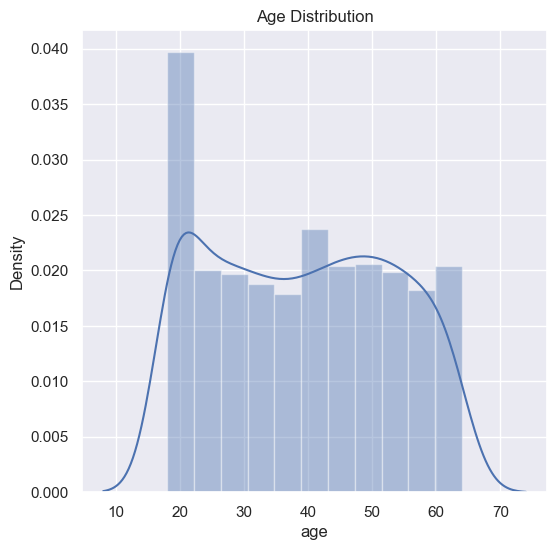

In [7]:
# age value distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

C:\Users\1111\AppData\Local\Temp\ipykernel_9144\1370486914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


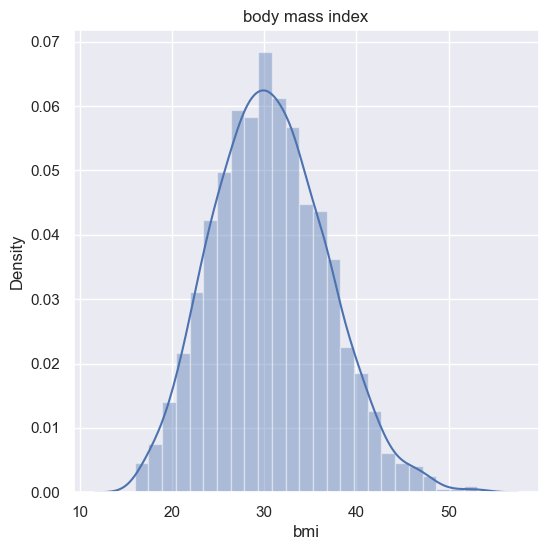

In [29]:
# bmi value distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('body mass index')
plt.show()

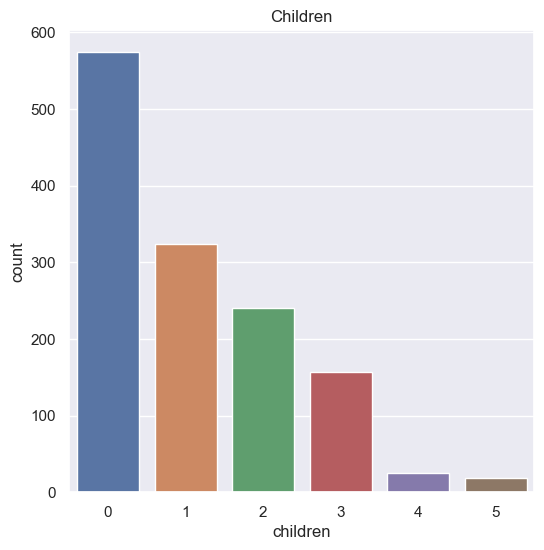

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [10]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\1111\AppData\Local\Temp\ipykernel_9144\2423477084.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


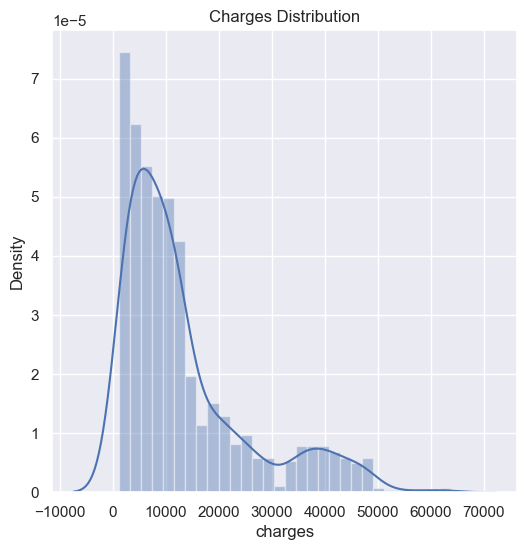

In [13]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [14]:
# encoding columns
df.replace({'sex':{'male':0,'female':1}}, inplace=True)
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

### splitting the features and targets

In [15]:
x = df.drop(columns='charges', axis=1)
y = df['charges']

In [16]:
x_check = x[-10:]
y_check = y[-10:]
X = x[:-10]
Y = y[:-10]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(1328, 6) (1062, 6) (266, 6)


### model - Linear Regression

In [19]:
regressor = LinearRegression()

In [20]:
regressor.fit(X_train, Y_train)

LinearRegression()

### training data prediction

In [21]:
prediction = regressor.predict(X_train)

In [22]:
# R squared value
r2_train = metrics.r2_score(Y_train, prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7561944270220764


### test data prediction

In [23]:
prediction2 = regressor.predict(X_test)

In [24]:
# R squared value
r2_train = metrics.r2_score(Y_test, prediction2)
print('R squared vale : ', r2_train)

R squared vale :  0.7263417378462242


### check_data prediction

In [25]:
x_check = x_check.reset_index(drop=True)

,age,sex,bmi,children,smoker,region
1328,23,1,24.225,2,1,2
1329,52,0,38.600,2,1,1
1330,57,1,25.740,2,1,0
1331,23,1,33.400,0,1,1
1332,52,1,44.700,3,1,1
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1
1337,61,1,29.070,0,0,3


In [26]:
prediction_check = regressor.predict(x_check)

In [27]:
prediction_check

array([ 2550.02301022, 14791.42701216, 11193.00496358,  4600.3221327 ,
       17801.62775303, 12659.49863879,  3116.95501093,  4226.75824011,
        1259.21661109, 37585.99135116])

In [28]:
np.array(y_check)

array([22395.74424, 10325.206  , 12629.1656 , 10795.93733, 11411.685  ,
       10600.5483 ,  2205.9808 ,  1629.8335 ,  2007.945  , 29141.3603 ])